In [1]:
import numpy as np
import pandas as pd
from starfish.plot import *

In [2]:
from starfish.set import settings

In [3]:
fisher1=pd.read_excel('lowl_litebird_fisher.xlsx',header=0,index_col=0)
fisher2=pd.read_excel('highl_cmb-s4_fisher.xlsx',header=0,index_col=0)
fisher3=pd.read_excel('highl_litebird_fisher.xlsx',header=0,index_col=0)

In [4]:
fisher=fisher1+fisher2+fisher3
fisher.to_excel('all.xlsx')
fisher

,omega_m0,omega_b0,h,n_s,sigma_8,m_nu,N_eff,tau,w0,wa
omega_m0,1.832635e+08,-6.900284e+08,1.362112e+08,-4.758042e+06,-5.746445e+07,-1.235692e+07,-6.552094e+06,4.454907e+07,2.340521e+06,3.384164e+05
omega_b0,-6.900284e+08,3.029247e+09,-4.576080e+08,3.225261e+07,2.230394e+08,4.722996e+07,2.324241e+07,-1.716450e+08,-9.264716e+06,-1.364851e+06
h,1.362112e+08,-4.576080e+08,1.120751e+08,-1.915047e+06,-3.813100e+07,-7.835263e+06,-5.457936e+06,2.958343e+07,3.655445e+06,7.486781e+05
n_s,-4.758042e+06,3.225261e+07,-1.915047e+06,1.048669e+06,1.680655e+06,3.181700e+05,1.135218e+05,-1.294412e+06,-1.428846e+05,-2.853892e+04
sigma_8,-5.746445e+07,2.230394e+08,-3.813100e+07,1.680655e+06,2.236678e+07,5.249881e+06,1.590900e+06,-1.730748e+07,1.355248e+06,4.330255e+05
m_nu,-1.235692e+07,4.722996e+07,-7.835263e+06,3.181700e+05,5.249881e+06,1.281325e+06,2.949168e+05,-4.086740e+06,5.324056e+05,1.552160e+05
N_eff,-6.552094e+06,2.324241e+07,-5.457936e+06,1.135218e+05,1.590900e+06,2.949168e+05,2.869853e+05,-1.229446e+06,-3.051864e+05,-6.932283e+04
tau,4.454907e+07,-1.716450e+08,2.958343e+07,-1.294412e+06,-1.730748e+07,-4.086740e+06,-1.229446e+06,1.373224e+07,-1.087846e+06,-3.453244e+05
w0,2.340521e+06,-9.264716e+06,3.655445e+06,-1.428846e+05,1.355248e+06,5.324056e+05,-3.051864e+05,-1.087846e+06,1.102819e+06,2.809177e+05
wa,3.384164e+05,-1.364851e+06,7.486781e+05,-2.853892e+04,4.330255e+05,1.552160e+05,-6.932283e+04,-3.453244e+05,2.809177e+05,7.193339e+04


In [5]:
cov=pd.DataFrame(np.linalg.inv(fisher.values),index=fisher.index,columns=fisher.columns)

In [6]:
name_width=max([len(v) for v in settings.var_name])
error_dict=dict(zip(settings.var_name,np.sqrt(np.diag(cov.values))))
print('1-sigma errors:')
for key in error_dict.keys():
    print(f'-- {key.rjust(name_width)}: {error_dict[key]:.1e}')

1-sigma errors:
-- omega_m0: 7.2e-02
-- omega_b0: 1.1e-02
--        h: 7.5e-02
--      n_s: 3.5e-03
--  sigma_8: 6.6e-02
--     m_nu: 1.4e-01
--    N_eff: 5.3e-02
--      tau: 2.0e-03
--       w0: 6.5e-01
--       wa: 2.4e+00


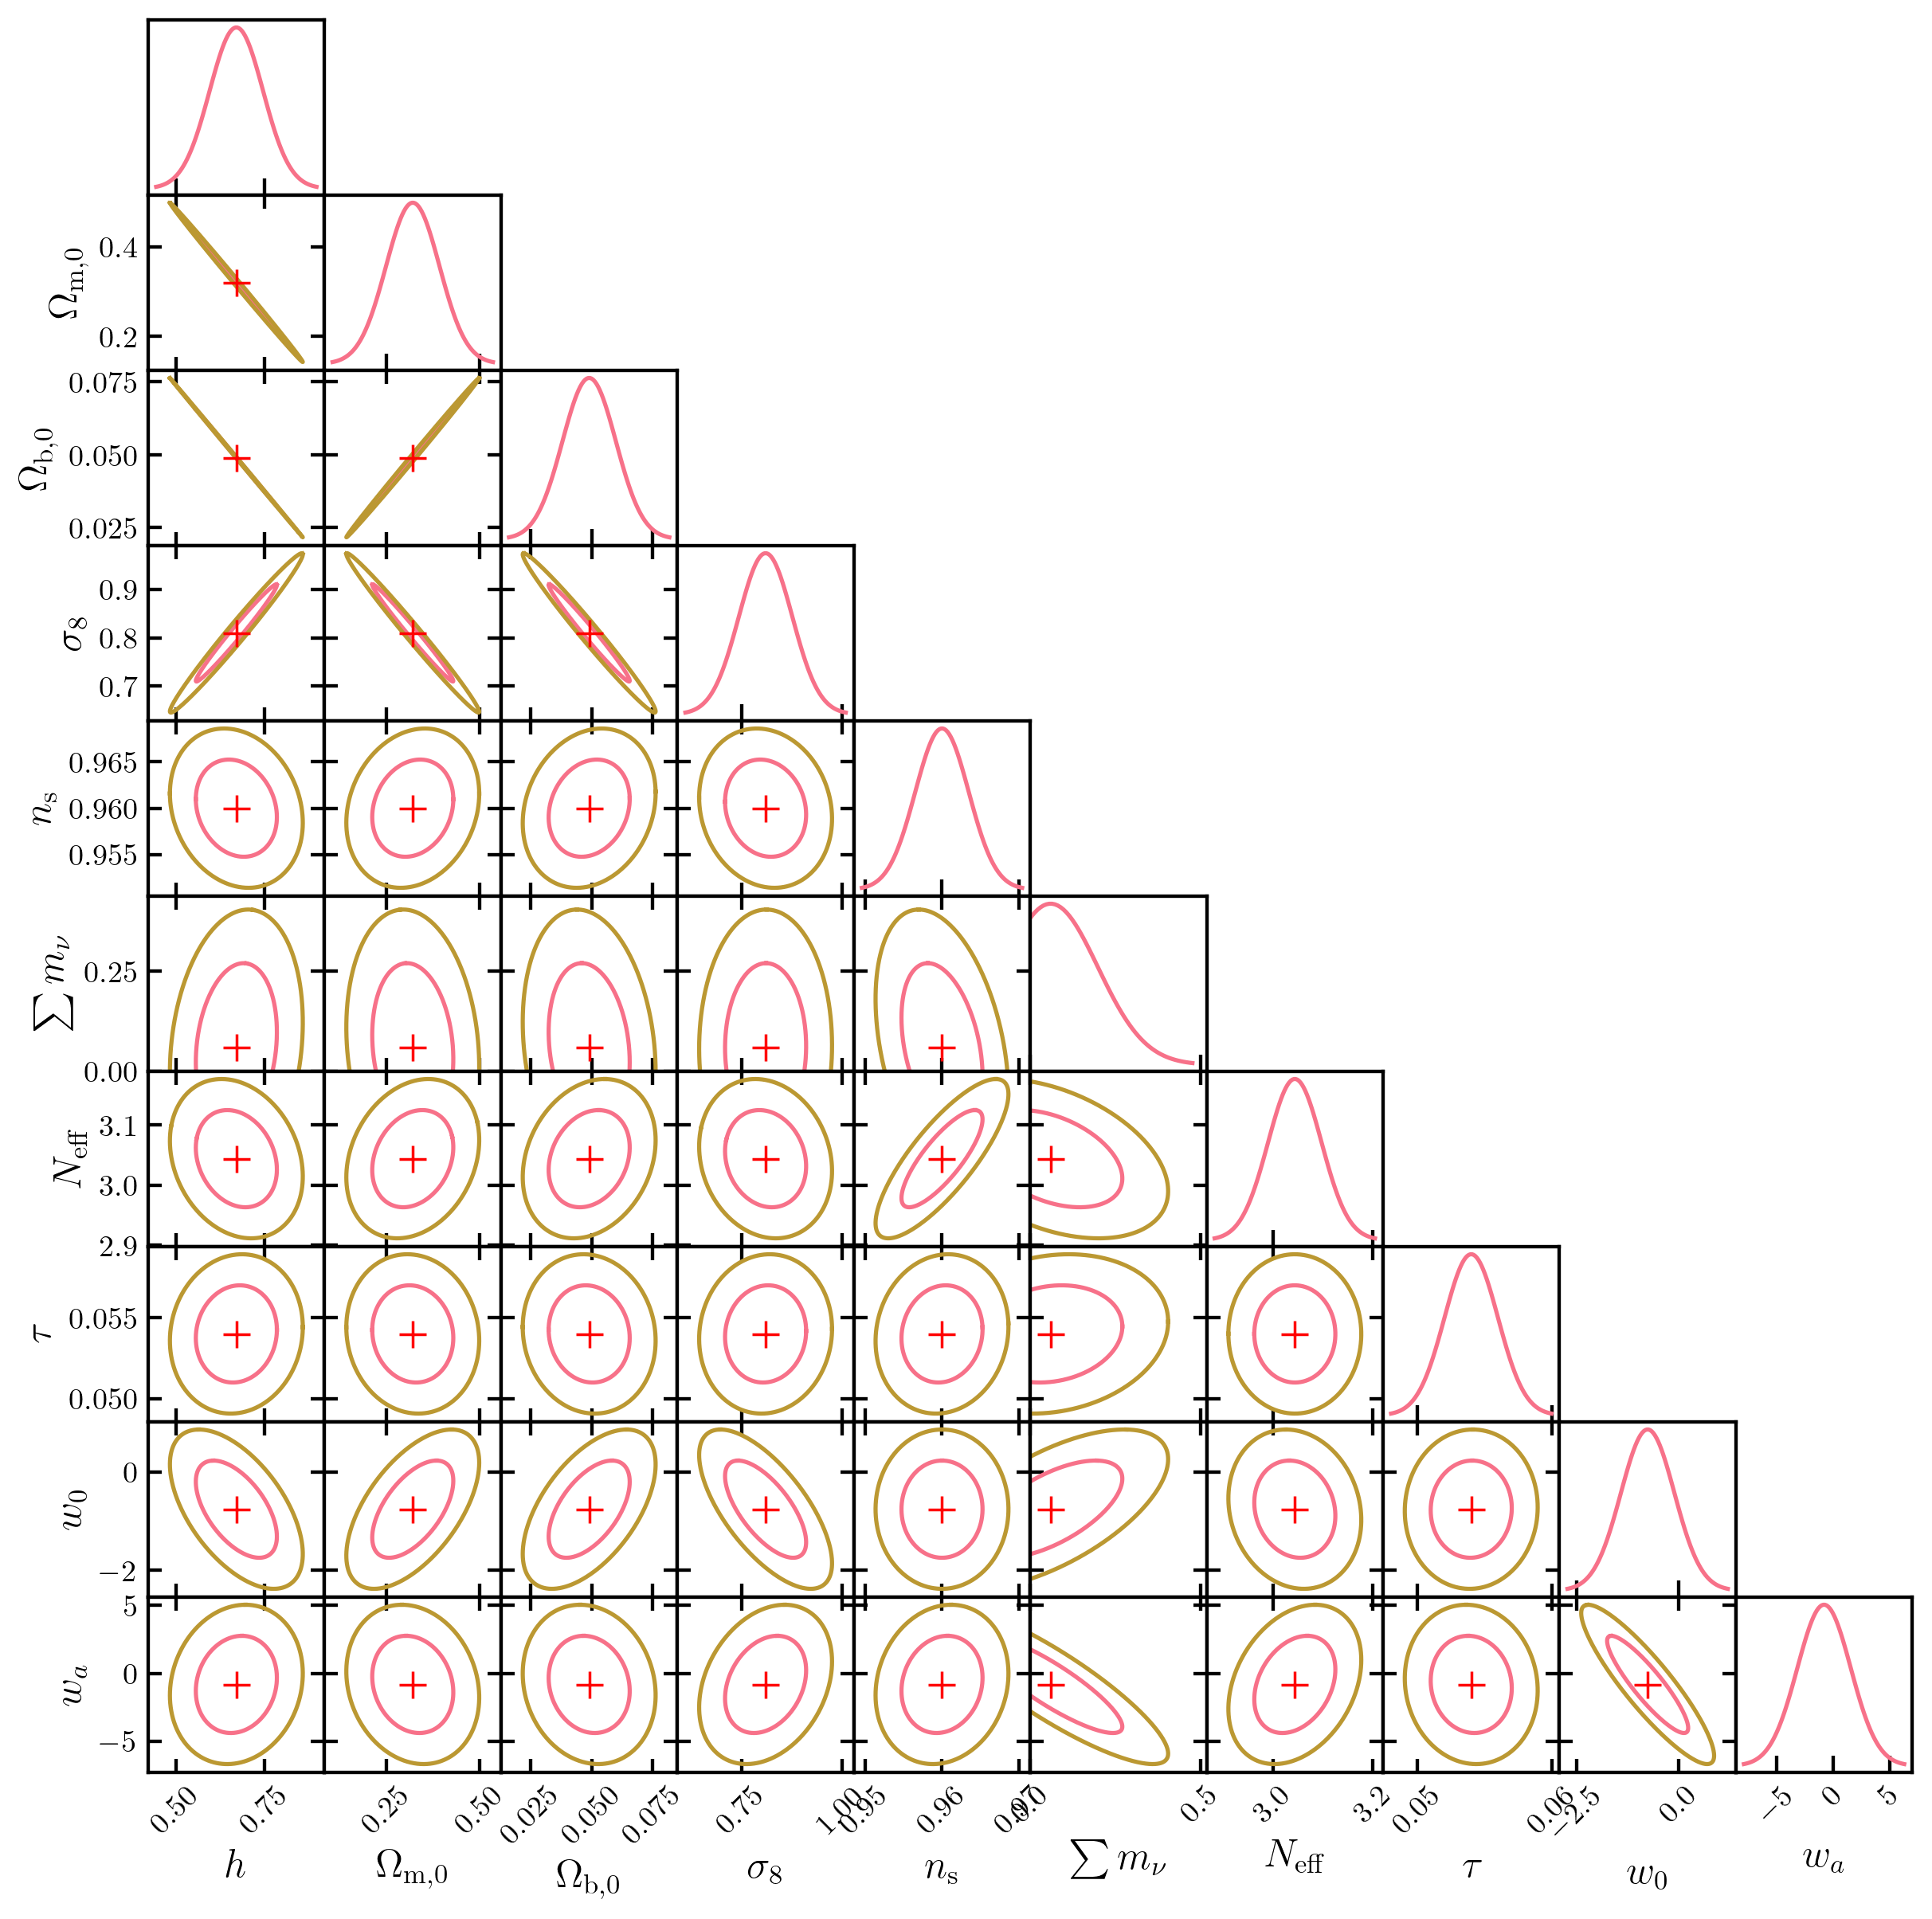

In [6]:
fig=get_figure(cov.values,['h','omega_m0','omega_b0','sigma_8','n_s','m_nu','N_eff','tau','w0','wa'])